In [101]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("temp_interactions.csv")
df

,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4,1
1,0,826,1,4,1
2,0,823,1,3,1
3,0,822,0,0,1
4,0,365,1,5,0
...,...,...,...,...,...
433317,442595,16307,0,0,0
433318,442595,16195,0,0,0
433319,442596,5364,1,4,0
433320,442597,7348,0,0,0


In [103]:
books = pd.read_csv("selectedBooks.csv")
books

,book_id,title,ratings_count,author_id,average_rating,description,image_url,author_name,split_description,genres
0,3,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,1077326,4.45,Harry Potter's life is miserable. His parents ...,https://images.gr-assets.com/books/1474154022m...,J.K. Rowling,"harry, potters, life, is, miserable, his, pare...","fantasy, paranormal, young-adult, fiction, chi..."
1,5907,The Hobbit,2099680,656983,4.25,In a hole in the ground there lived a hobbit. ...,https://images.gr-assets.com/books/1372847500m...,J.R.R. Tolkien,"in, a, hole, in, the, ground, there, lived, a,...","young-adult, fantasy, paranormal, children, fi..."
2,5,Harry Potter and the Prisoner of Azkaban (Harr...,1876252,1077326,4.53,Harry Potter's third year at Hogwarts is full ...,https://images.gr-assets.com/books/1499277281m...,J.K. Rowling,"harry, potters, third, year, at, hogwarts, is,...","fiction, children, fantasy, paranormal, young-..."
3,15881,Harry Potter and the Chamber of Secrets (Harry...,1821802,1077326,4.38,The Dursleys were so mean and hideous that sum...,https://images.gr-assets.com/books/1474169725m...,J.K. Rowling,"the, dursleys, were, so, mean, and, hideous, t...","fantasy, paranormal, young-adult, fiction, chi..."
4,34,The Fellowship of the Ring (The Lord of the Ri...,1813229,656983,4.34,"One Ring to rule them all, One Ring to find th...",https://images.gr-assets.com/books/1298411339m...,J.R.R. Tolkien,"one, ring, to, rule, them, all,, one, ring, to...","fantasy, paranormal, fiction, young-adult"
...,...,...,...,...,...,...,...,...,...,...
3066,3569016,The Boomerang Clue,201,123715,3.84,Librarian's Note: this is an alternate cover e...,https://images.gr-assets.com/books/1342317269m...,Agatha Christie,"librarians, note:, this, is, an, alternate, co...","mystery, thriller, crime, fiction, romance, hi..."
3067,11813376,Mother Earth Mother Board,201,545,4.36,The hacker tourist ventures forth across the w...,https://images.gr-assets.com/books/1357582773m...,Neal Stephenson,"the, hacker, tourist, ventures, forth, across,...","history, historical fiction, biography, non-fi..."
3068,19549137,"Crown of Midnight (Throne of Glass, #2)",201,3433047,4.49,12 hrs 24 mins\nShe is the greatest assassin h...,https://images.gr-assets.com/books/1387552634m...,Sarah J. Maas,"12, hrs, 24, mins, she, is, the, greatest, ass...","fantasy, paranormal, romance, young-adult, fic..."
3069,31847104,The Hitchhiker's Guide to the Galaxy (Hitchhik...,201,4,4.20,The Hitchhiker's Guide to the Galaxyhas been a...,https://images.gr-assets.com/books/1473188155m...,Douglas Adams,"the, hitchhikers, guide, to, the, galaxyhas, b...","fiction, fantasy, paranormal, young-adult"


In [104]:
df


,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4,1
1,0,826,1,4,1
2,0,823,1,3,1
3,0,822,0,0,1
4,0,365,1,5,0
...,...,...,...,...,...
433317,442595,16307,0,0,0
433318,442595,16195,0,0,0
433319,442596,5364,1,4,0
433320,442597,7348,0,0,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433322 entries, 0 to 433321
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      433322 non-null  int64
 1   book_id      433322 non-null  int64
 2   is_read      433322 non-null  int64
 3   rating       433322 non-null  int64
 4   is_reviewed  433322 non-null  int64
dtypes: int64(5)
memory usage: 16.5 MB


In [106]:
df["user_id"].value_counts()

165733    208
396456    156
339532    155
386880    146
59545     146
         ... 
76268       1
381458      1
170028      1
381455      1
344268      1
Name: user_id, Length: 101266, dtype: int64

In [107]:
df["book_id"].value_counts()

7348      30776
7337      15436
10        11951
7332      11811
7349       8800
          ...  
239729       51
74377        51
276307       51
535757       51
34517        51
Name: book_id, Length: 581, dtype: int64

In [109]:
df = df[df["rating"] > 0]

In [110]:
df

,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4,1
1,0,826,1,4,1
2,0,823,1,3,1
4,0,365,1,5,0
6,0,357,1,5,0
...,...,...,...,...,...
433306,442593,68524,1,4,1
433307,442593,16312,1,3,0
433311,442593,822,1,4,1
433316,442595,7348,1,5,0


In [114]:
df["rating"] = df["rating"].values.astype(np.float32)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13812\3857626606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = df["rating"].values.astype(np.float32)


In [115]:
df

,user_id,book_id,is_read,rating,is_reviewed
0,0,830,1,4.0,1
1,0,826,1,4.0,1
2,0,823,1,3.0,1
4,0,365,1,5.0,0
6,0,357,1,5.0,0
...,...,...,...,...,...
433306,442593,68524,1,4.0,1
433307,442593,16312,1,3.0,0
433311,442593,822,1,4.0,1
433316,442595,7348,1,5.0,0


In [116]:
df["user_id"].value_counts()

146501    38
320562    37
72944     30
184022    29
223329    27
          ..
207073     1
207077     1
207081     1
207089     1
442596     1
Name: user_id, Length: 72484, dtype: int64

In [117]:
user_ids = df["user_id"].unique().tolist()

In [118]:
book_ids = df["book_id"].unique().tolist()

In [119]:
enumerate_userids = {x: i for i, x in enumerate(user_ids)}

In [120]:
enumerate_bookids = {x: i for i, x in enumerate(book_ids)}

In [121]:
enumerate_userids

{0: 0,
 11: 1,
 14: 2,
 20: 3,
 22: 4,
 24: 5,
 28: 6,
 30: 7,
 34: 8,
 50: 9,
 66: 10,
 75: 11,
 90: 12,
 91: 13,
 112: 14,
 117: 15,
 119: 16,
 124: 17,
 132: 18,
 134: 19,
 142: 20,
 161: 21,
 162: 22,
 166: 23,
 167: 24,
 186: 25,
 195: 26,
 200: 27,
 211: 28,
 225: 29,
 226: 30,
 246: 31,
 247: 32,
 251: 33,
 255: 34,
 260: 35,
 266: 36,
 270: 37,
 273: 38,
 280: 39,
 281: 40,
 282: 41,
 287: 42,
 292: 43,
 297: 44,
 306: 45,
 308: 46,
 309: 47,
 310: 48,
 311: 49,
 319: 50,
 321: 51,
 323: 52,
 325: 53,
 337: 54,
 343: 55,
 349: 56,
 355: 57,
 358: 58,
 362: 59,
 364: 60,
 366: 61,
 370: 62,
 379: 63,
 388: 64,
 391: 65,
 393: 66,
 394: 67,
 396: 68,
 397: 69,
 400: 70,
 405: 71,
 410: 72,
 415: 73,
 423: 74,
 425: 75,
 427: 76,
 430: 77,
 432: 78,
 433: 79,
 435: 80,
 438: 81,
 445: 82,
 450: 83,
 451: 84,
 456: 85,
 459: 86,
 460: 87,
 465: 88,
 469: 89,
 471: 90,
 475: 91,
 480: 92,
 490: 93,
 491: 94,
 492: 95,
 494: 96,
 495: 97,
 496: 98,
 497: 99,
 498: 100,
 500: 101,
 50

In [122]:
enumerate_bookids

{830: 0,
 826: 1,
 823: 2,
 365: 3,
 357: 4,
 14: 5,
 7349: 6,
 12645: 7,
 11318: 8,
 10990: 9,
 10917: 10,
 10916: 11,
 8694: 12,
 14186: 13,
 14185: 14,
 14180: 15,
 14100: 16,
 14867: 17,
 14865: 18,
 15279: 19,
 15241: 20,
 5364: 21,
 15925: 22,
 17076: 23,
 17055: 24,
 16907: 25,
 30: 26,
 16427: 27,
 16424: 28,
 16368: 29,
 16366: 30,
 16361: 31,
 16358: 32,
 10: 33,
 16339: 34,
 16332: 35,
 16342: 36,
 18937: 37,
 16694: 38,
 21436: 39,
 12070: 40,
 822: 41,
 25106: 42,
 25105: 43,
 25104: 44,
 25103: 45,
 25102: 46,
 25101: 47,
 25100: 48,
 25099: 49,
 7337: 50,
 16306: 51,
 26046: 52,
 31319: 53,
 31309: 54,
 31299: 55,
 31092: 56,
 16422: 57,
 34540: 58,
 34507: 59,
 33342: 60,
 13152: 61,
 35736: 62,
 2015: 63,
 16308: 64,
 16307: 65,
 7332: 66,
 16312: 67,
 16326: 68,
 45277: 69,
 12618: 70,
 45107: 71,
 45102: 72,
 45101: 73,
 45100: 74,
 43927: 75,
 43926: 76,
 43924: 77,
 15350: 78,
 16195: 79,
 49596: 80,
 7348: 81,
 17327: 82,
 41905: 83,
 5912: 84,
 7346: 85,
 61651: 

In [123]:
df["user_idx"] = df["user_id"].map(enumerate_userids)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13812\3416060562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["user_idx"] = df["user_id"].map(enumerate_userids)


In [124]:
df["book_idx"] = df["book_id"].map(enumerate_bookids)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13812\774552656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["book_idx"] = df["book_id"].map(enumerate_bookids)


In [125]:
df

,user_id,book_id,is_read,rating,is_reviewed,user_idx,book_idx
0,0,830,1,4.0,1,0,0
1,0,826,1,4.0,1,0,1
2,0,823,1,3.0,1,0,2
4,0,365,1,5.0,0,0,3
6,0,357,1,5.0,0,0,4
...,...,...,...,...,...,...,...
433306,442593,68524,1,4.0,1,72481,115
433307,442593,16312,1,3.0,0,72481,67
433311,442593,822,1,4.0,1,72481,41
433316,442595,7348,1,5.0,0,72482,81


In [126]:
x = df[['user_idx', 'book_idx']].values
x

array([[    0,     0],
       [    0,     1],
       [    0,     2],
       ...,
       [72481,    41],
       [72482,    81],
       [72483,    21]], dtype=int64)

In [127]:
y = df['rating'].values
y.max(), y.min()

(5.0, 1.0)

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

reshaped_y = y.reshape(-1, 1)

y_norm = scaler.fit_transform(reshaped_y)

y_norm.max(), y_norm.min()


(1.0, 0.0)

In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_norm, test_size=0.2, random_state=42)

In [130]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((143035, 2), (143035, 1), (35759, 2), (35759, 1))

In [131]:
#emedding 
user_size = df["user_id"].nunique()

book_size = df["book_id"].nunique()
user_size, book_size


(72484, 580)

In [132]:
tf.random.set_seed(42)
embedding_size = 50
user_input = tf.keras.layers.Input(shape=[1])
user_embed_layer =tf.keras.layers.Embedding(user_size, embedding_size)(user_input)
users = tf.keras.layers.Flatten()(user_embed_layer)
book_input = tf.keras.layers.Input(shape=[1])
book_embed_layer = tf.keras.layers.Embedding(book_size, embedding_size)(book_input)
books = tf.keras.layers.Flatten()(book_embed_layer)
dot_product = tf.keras.layers.Dot(axes=1)(inputs=[users, books],)


layer_1 = tf.keras.layers.Dense(32, activation='relu')(dot_product)
layer_2 = tf.keras.layers.Dense(32, activation ='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(1, activation='relu')(layer_2)
    

model = tf.keras.Model([user_input, book_input], layer_3)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["mae"])





In [133]:
from keras.utils import plot_model

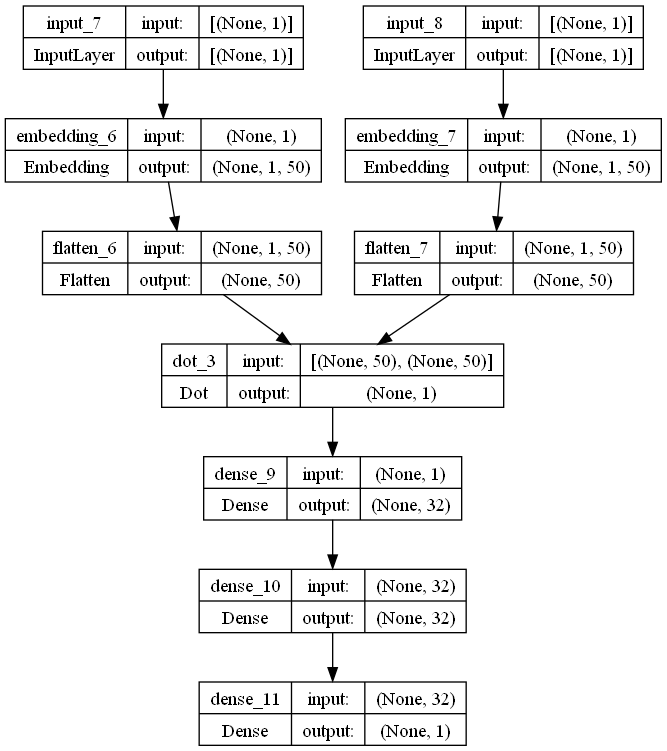

In [134]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [135]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 1, 50)                3624200   ['input_7[0][0]']             
                                                                                                  
 embedding_7 (Embedding)     (None, 1, 50)                29000     ['input_8[0][0]']             
                                                                                            

In [136]:
model.fit([x_train[:,0], x_train[:,1]], y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
3576/3576 [==============================] - 362s 101ms/step - loss: 0.1876 - mae: 0.1876 - val_loss: 0.1833 - val_mae: 0.1833
Epoch 2/10
3576/3576 [==============================] - 293s 82ms/step - loss: 0.1832 - mae: 0.1832 - val_loss: 0.1817 - val_mae: 0.1817
Epoch 3/10
3576/3576 [==============================] - 302s 84ms/step - loss: 0.1791 - mae: 0.1791 - val_loss: 0.1805 - val_mae: 0.1805
Epoch 4/10
3576/3576 [==============================] - 274s 77ms/step - loss: 0.1489 - mae: 0.1489 - val_loss: 0.2012 - val_mae: 0.2012
Epoch 5/10
3576/3576 [==============================] - 261s 73ms/step - loss: 0.0929 - mae: 0.0929 - val_loss: 0.1958 - val_mae: 0.1958
Epoch 6/10
3576/3576 [==============================] - 259s 72ms/step - loss: 0.0636 - mae: 0.0636 - val_loss: 0.1942 - val_mae: 0.1942
Epoch 7/10
3576/3576 [==============================] - 262s 73ms/step - loss: 0.0542 - mae: 0.0542 - val_loss: 0.1939 - val_mae: 0.1939
Epoch 8/10
3576/3576 [==================

In [137]:
model.evaluate([x_test[:,0], x_test[:, 1]], y_test)

1118/1118 [==============================] - 2s 2ms/step - loss: 0.1970 - mae: 0.1970


[0.19701462984085083, 0.19701462984085083]

In [138]:
model.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [139]:
tf.random.set_seed(42)
embedding_size = 100
user_input = tf.keras.layers.Input(shape=[1])
user_embed_layer =tf.keras.layers.Embedding(user_size, embedding_size)(user_input)
users = tf.keras.layers.Flatten()(user_embed_layer)
book_input = tf.keras.layers.Input(shape=[1])
book_embed_layer = tf.keras.layers.Embedding(book_size, embedding_size)(book_input)
books = tf.keras.layers.Flatten()(book_embed_layer)
dot_product = tf.keras.layers.Dot(axes=1)(inputs=[users, books],)


layer_1 = tf.keras.layers.Dense(32, activation='relu')(dot_product)
layer_2 = tf.keras.layers.Dense(32, activation ='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(1, activation='relu')(layer_2)
    

model = tf.keras.Model([user_input, book_input], layer_3)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics =["mae"])




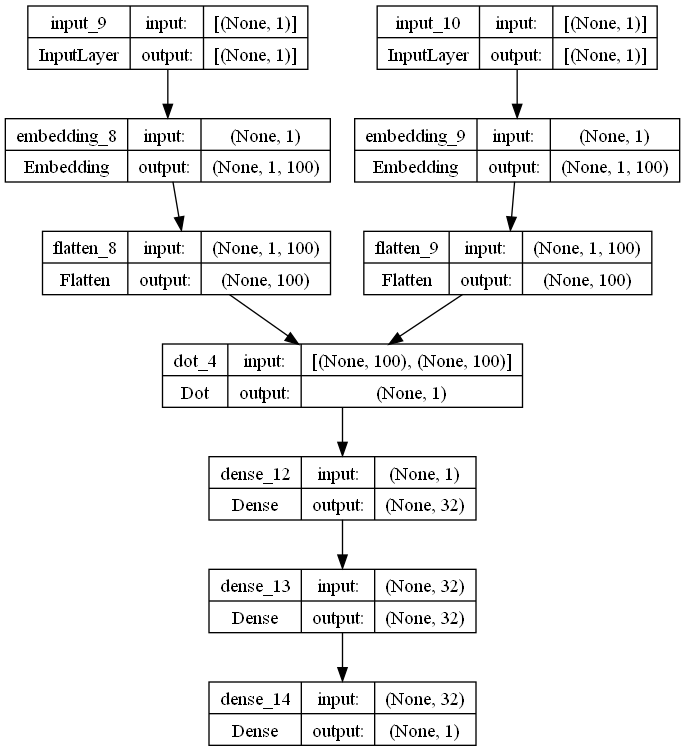

In [140]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [141]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 1, 100)               7248400   ['input_9[0][0]']             
                                                                                                  
 embedding_9 (Embedding)     (None, 1, 100)               58000     ['input_10[0][0]']            
                                                                                            